In [1]:
!wget http://cb.lk/covid_19


--2020-05-15 19:17:30--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-05-15 19:17:31--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-05-15 19:17:32--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-05-15 19:17:32--  https://www.dropbox.com/s/raw/7rjw

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [4]:
import os
import pandas as pd 
import imageio

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import scipy.ndimage as ndi

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


Using TensorFlow backend.


In [0]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Val"


In [0]:
train_covid_path=os.path.join(TRAIN_PATH,'Covid')
train_normal_path=os.path.join(TRAIN_PATH,'Normal')
val_normal_path=os.path.join(VAL_PATH,'Normal')
val_covid_path=os.path.join(VAL_PATH,'Covid')


X-Rays Of Healthy Person


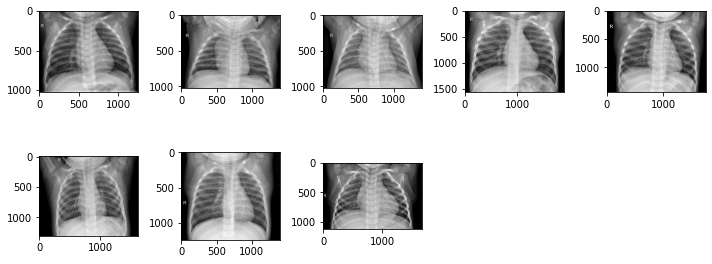

In [58]:
def plot_imgs(item_dir, num_imgs=8):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]


    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path,0)
        plt.imshow(img,cmap='gray')

    plt.tight_layout()
print("X-Rays Of Healthy Person")
plot_imgs(train_normal_path)

X-Rays Of Covid Person


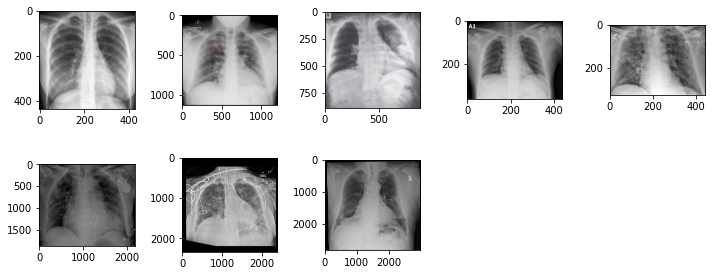

In [14]:
def plot_imgs(item_dir, num_imgs=8):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path,0)
        plt.imshow(img,cmap='gray')

    plt.tight_layout()
print("X-Rays Of Covid Person")
plot_imgs(train_covid_path)

In [0]:
input_dimension=(64,64,3)
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_dimension))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [0]:
train_data=image.ImageDataGenerator(
rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_data=image.ImageDataGenerator(rescale=1/255)

In [24]:
train_generator=train_data.flow_from_directory(
    TRAIN_PATH,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
    
    

)

Found 224 images belonging to 2 classes.


In [25]:
validation_generator=test_data.flow_from_directory(
    
    VAL_PATH,
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
    

)

Found 60 images belonging to 2 classes.


In [28]:
hist=model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    
    validation_steps=2

)

Epoch 1/10
7/7 [==============================] - 11s 2s/step - loss: 0.0907 - accuracy: 0.9643 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 0.0645 - accuracy: 0.9911 - val_loss: 0.0670 - val_accuracy: 0.9833
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 0.0802 - accuracy: 0.9732 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 10s 1s/step - loss: 0.0911 - accuracy: 0.9732 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 10s 1s/step - loss: 0.0772 - accuracy: 0.9643 - val_loss: 0.1221 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.0412 - accuracy: 0.9911 - val_loss: 0.0356 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 10s 1s/step - loss: 0.0252 - accuracy: 0.9955 - val_loss: 0.0070 - val_accuracy: 0.9833
Epoch 8/10
7/7 [==================

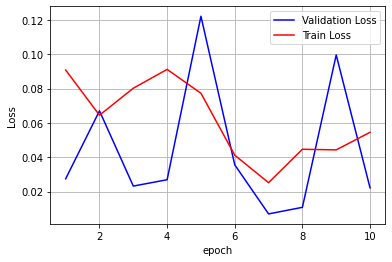

In [29]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,11))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = hist.history['val_loss']
ty = hist.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model.save("covid_model.h5")

In [0]:
model=load_model("covid_model.h5")
y_actual=[]
y_test=[]


In [0]:
import os
for i in os.listdir("./CovidDataset/Val/Normal/"):
  
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(64,64))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:

import os
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(64,64))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

<Figure size 432x288 with 0 Axes>

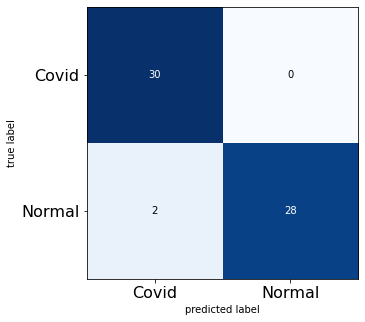

In [39]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm  = confusion_matrix(y_actual, y_test)
plt.figure()
plot_confusion_matrix(cm,figsize=(10,5), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Covid', 'Normal'], fontsize=16)
plt.yticks(range(2), ['Covid', 'Normal'], fontsize=16)
plt.show()

In [0]:
y_test=[]
y_actual=[]
true_image=[]
false_image=[]
import os
for i in os.listdir("./CovidDataset/Val/Normal/"):
  
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(64,64))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  
  y_test.append(p[0,0])
  y_actual.append(1)
  if y_test[-1] == y_actual[-1]:
    true_image.append(val_normal_path+"/"+i)
  else:
    false_image.append(val_normal_path+"/"+i)
    
     
  

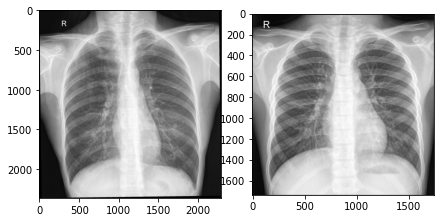

In [61]:
plt.figure(figsize=(15, 15))
for idx, img_path in enumerate(false_image):
  plt.subplot(5, 5, idx+1)
  
  img = plt.imread(img_path,0)
  plt.imshow(img,cmap='gray')
  plt.tight_layout()


In [0]:
## This Two Xray Images Were Normal But Predicted as Covid +ve